In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.duplicated().sum()

24

In [6]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

0

In [7]:
df.shape

(32536, 15)

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Seems like there are no missing values

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
df['Income'].nunique()

2

In [11]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

There is high level of imbalance in the target variable

In [12]:
df['Capital_gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [13]:
df['Capital_loss'].value_counts()

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

# EDA

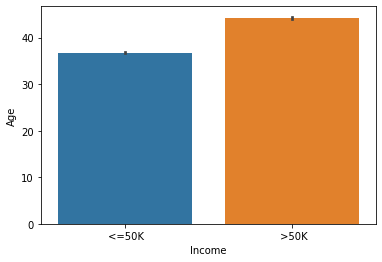

In [14]:
sns.barplot(x='Income',y= 'Age',data=df)
plt.show()

Income has a direct correlation with Age

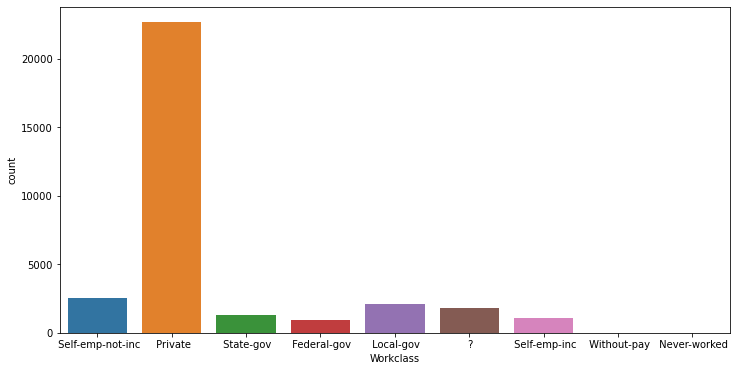

In [15]:
plt.figure(figsize=[12,6])
sns.countplot(df['Workclass'])
plt.show()

Private worker group is dominating all the other groups by a huge gap

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

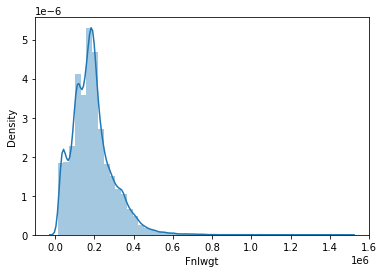

In [16]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Fnlwgt'>

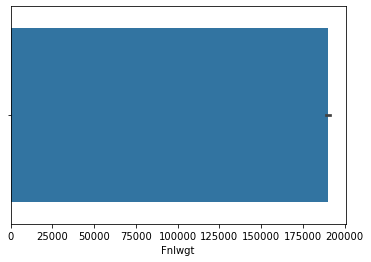

In [17]:
sns.barplot(df['Fnlwgt'])

This feature seems to be right skewed, may contain outliers

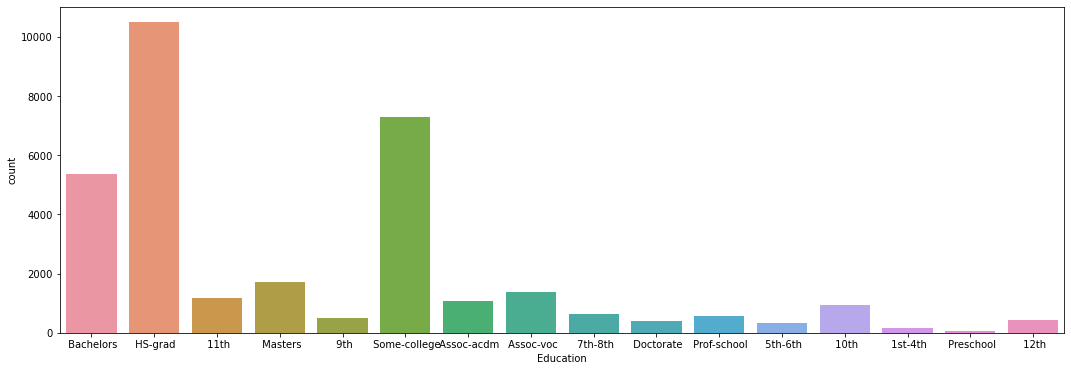

In [18]:
plt.figure(figsize=[18,6])
sns.countplot(df['Education'])
plt.show()

Let us now convert the categorical data into numerical using label encoder

Lets create the instance for Object data type. We will use the same for changing the categorical data to numerical.

In [19]:
Object=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    df[i]=le.fit_transform(df[i])

In [20]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


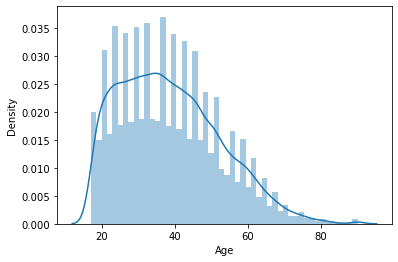

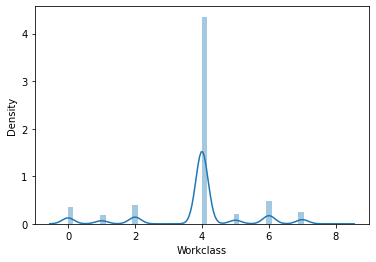

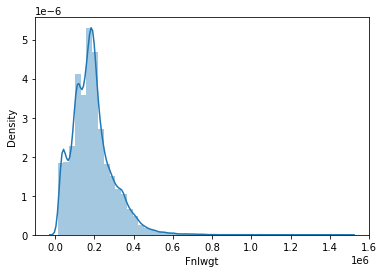

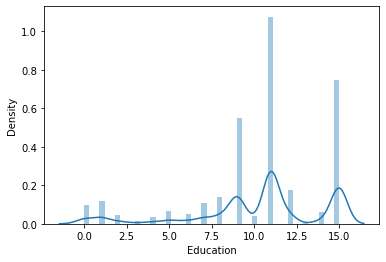

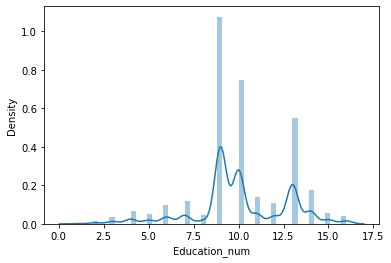

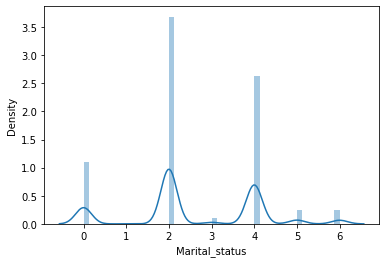

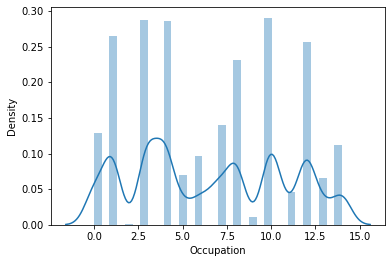

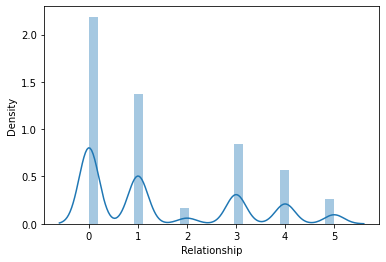

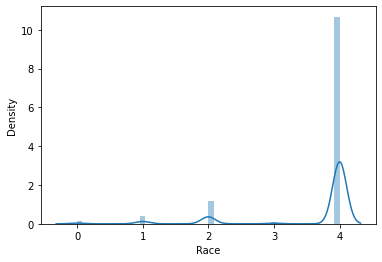

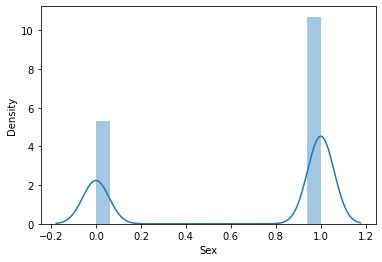

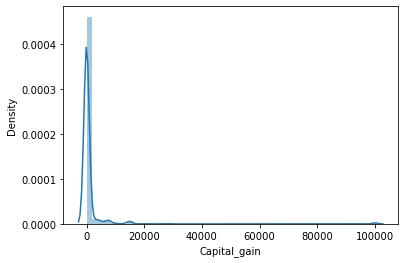

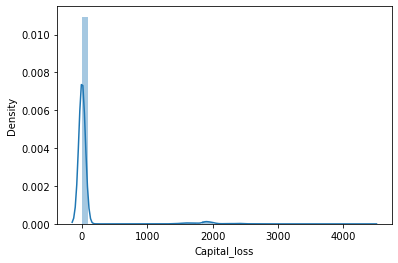

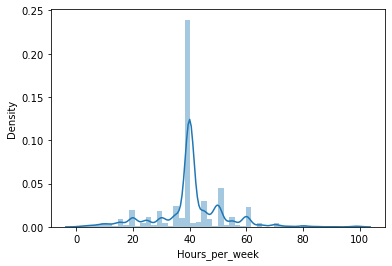

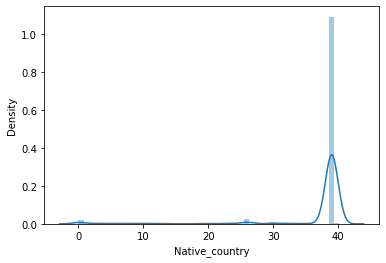

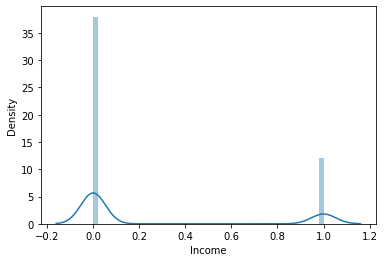

In [21]:
columns=df.columns

for i in columns:
    sns.distplot(df[i])
    plt.show()

Fnlwgt, Capital_gain,Capital_loss are right skewed data

Let us check the skewness and treat it

In [22]:
df.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

I shall use power transformation to treat the skeness

In [23]:
from sklearn.preprocessing import power_transform

col_skewd = ['Age','Workclass','Fnlwgt','Education','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country','Income']

for i in col_skewd:
    
    df[i]=power_transform(df[i].to_numpy().reshape(-1, 1))


In [24]:
df.skew()

Age              -0.013967
Workclass         0.061229
Fnlwgt            0.016961
Education        -0.309379
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.123000
Race             -2.010646
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
Native_country   -2.728041
Income            1.211640
dtype: float64

In [26]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
df['Income']=qt.fit_transform(df['Income'].to_numpy().reshape(-1, 1))


In [27]:
df['Income'].skew()

1.211640103229104

Capital_loss & Capital_gain are still highly right skewd, let us see if that is due to the effect of outliers

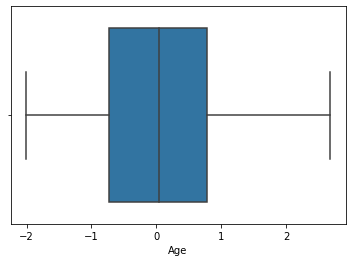

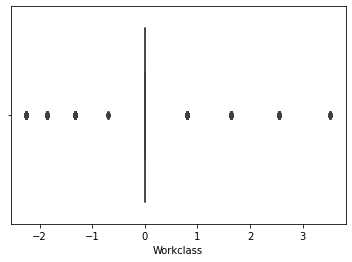

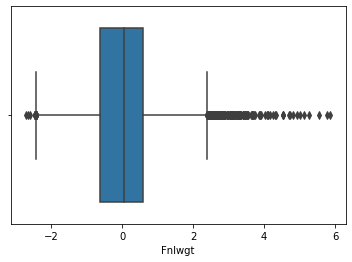

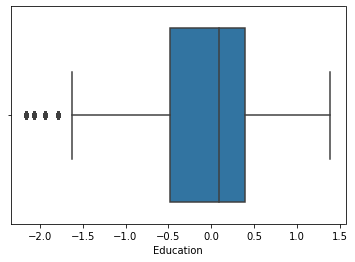

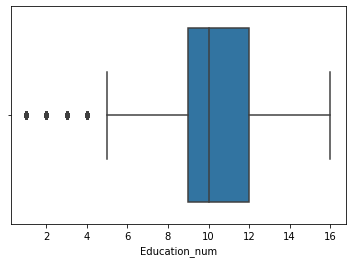

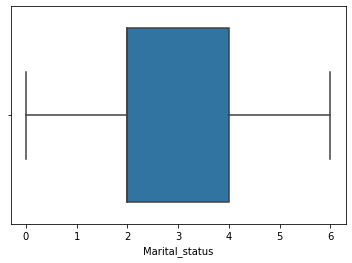

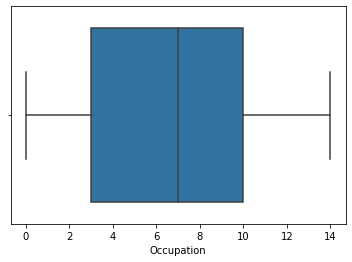

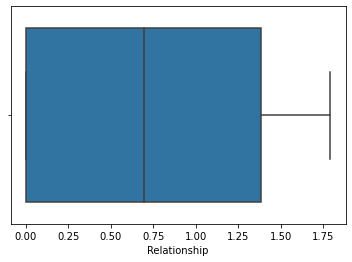

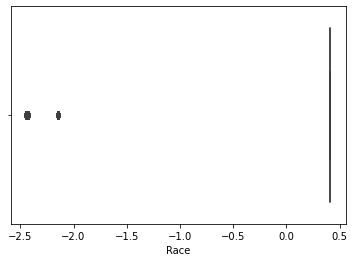

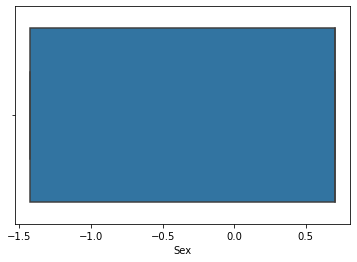

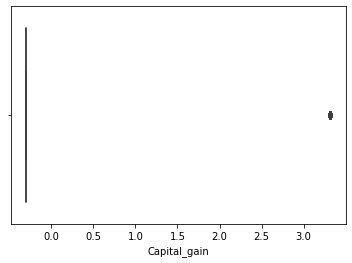

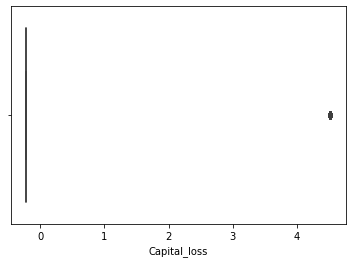

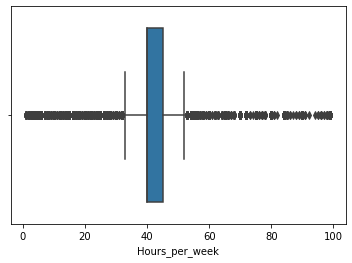

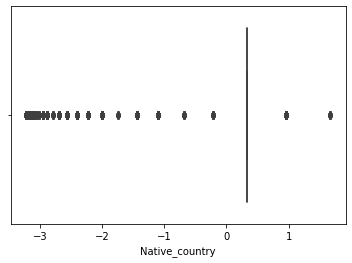

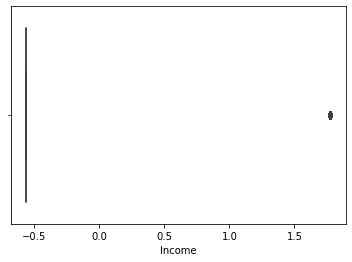

In [46]:
columns=df.columns

for i in columns:
    sns.boxplot(df[i])
    plt.show()

In [47]:
# Let us remove the outliers by standard deviation method

from numpy import mean
from numpy import std


columns=['Hours_per_week','Fnlwgt']

for i in columns:
    if isinstance(df[i][0], str) :
        continue
    else:
        #Calculating Mean and Std 
        mean, std = (df[i].mean(),df[i].std())
        # identify outliers
        cut_off = std*3
        lower, upper = mean - cut_off, mean + cut_off
        outliers = [x for x in df[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        df[i] = df[i].apply(lambda x: lower if x < lower else (upper if x > upper else x))



Identified outliers: 440
Identified outliers: 103


In [48]:
df.skew()

Age              -0.032023
Workclass         0.061229
Fnlwgt           -0.063862
Education        -0.309379
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.284987
Race             -2.010646
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week   -0.104826
Native_country   -2.728041
Income            1.211640
dtype: float64

Skewness could still not be improved for a few columns. Let us check it later

Now I want to find the correltion using heatmap

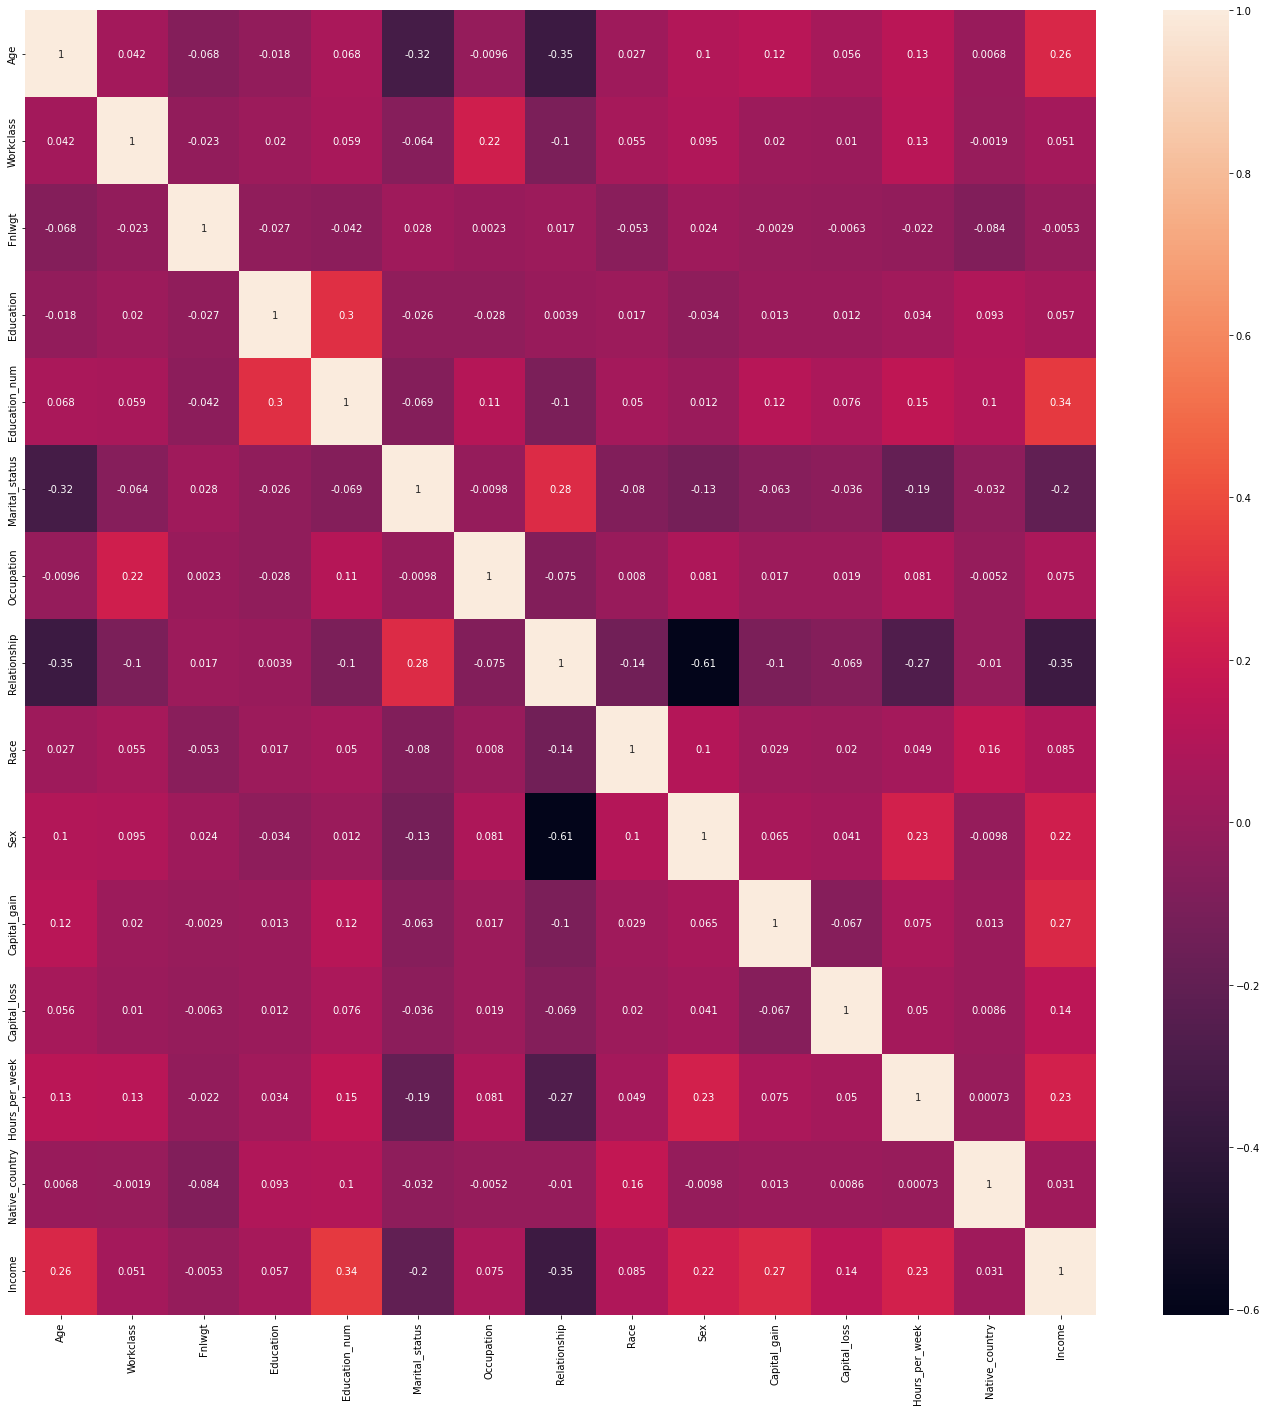

In [28]:
# Let us now see the correlation by plotting heatmap

corr_hmap=df.corr()

plt.figure(figsize=(24,24))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Seems to be not much correlation between the features

In [29]:
# Let us find out which feature has high correlation(>0.7)

for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

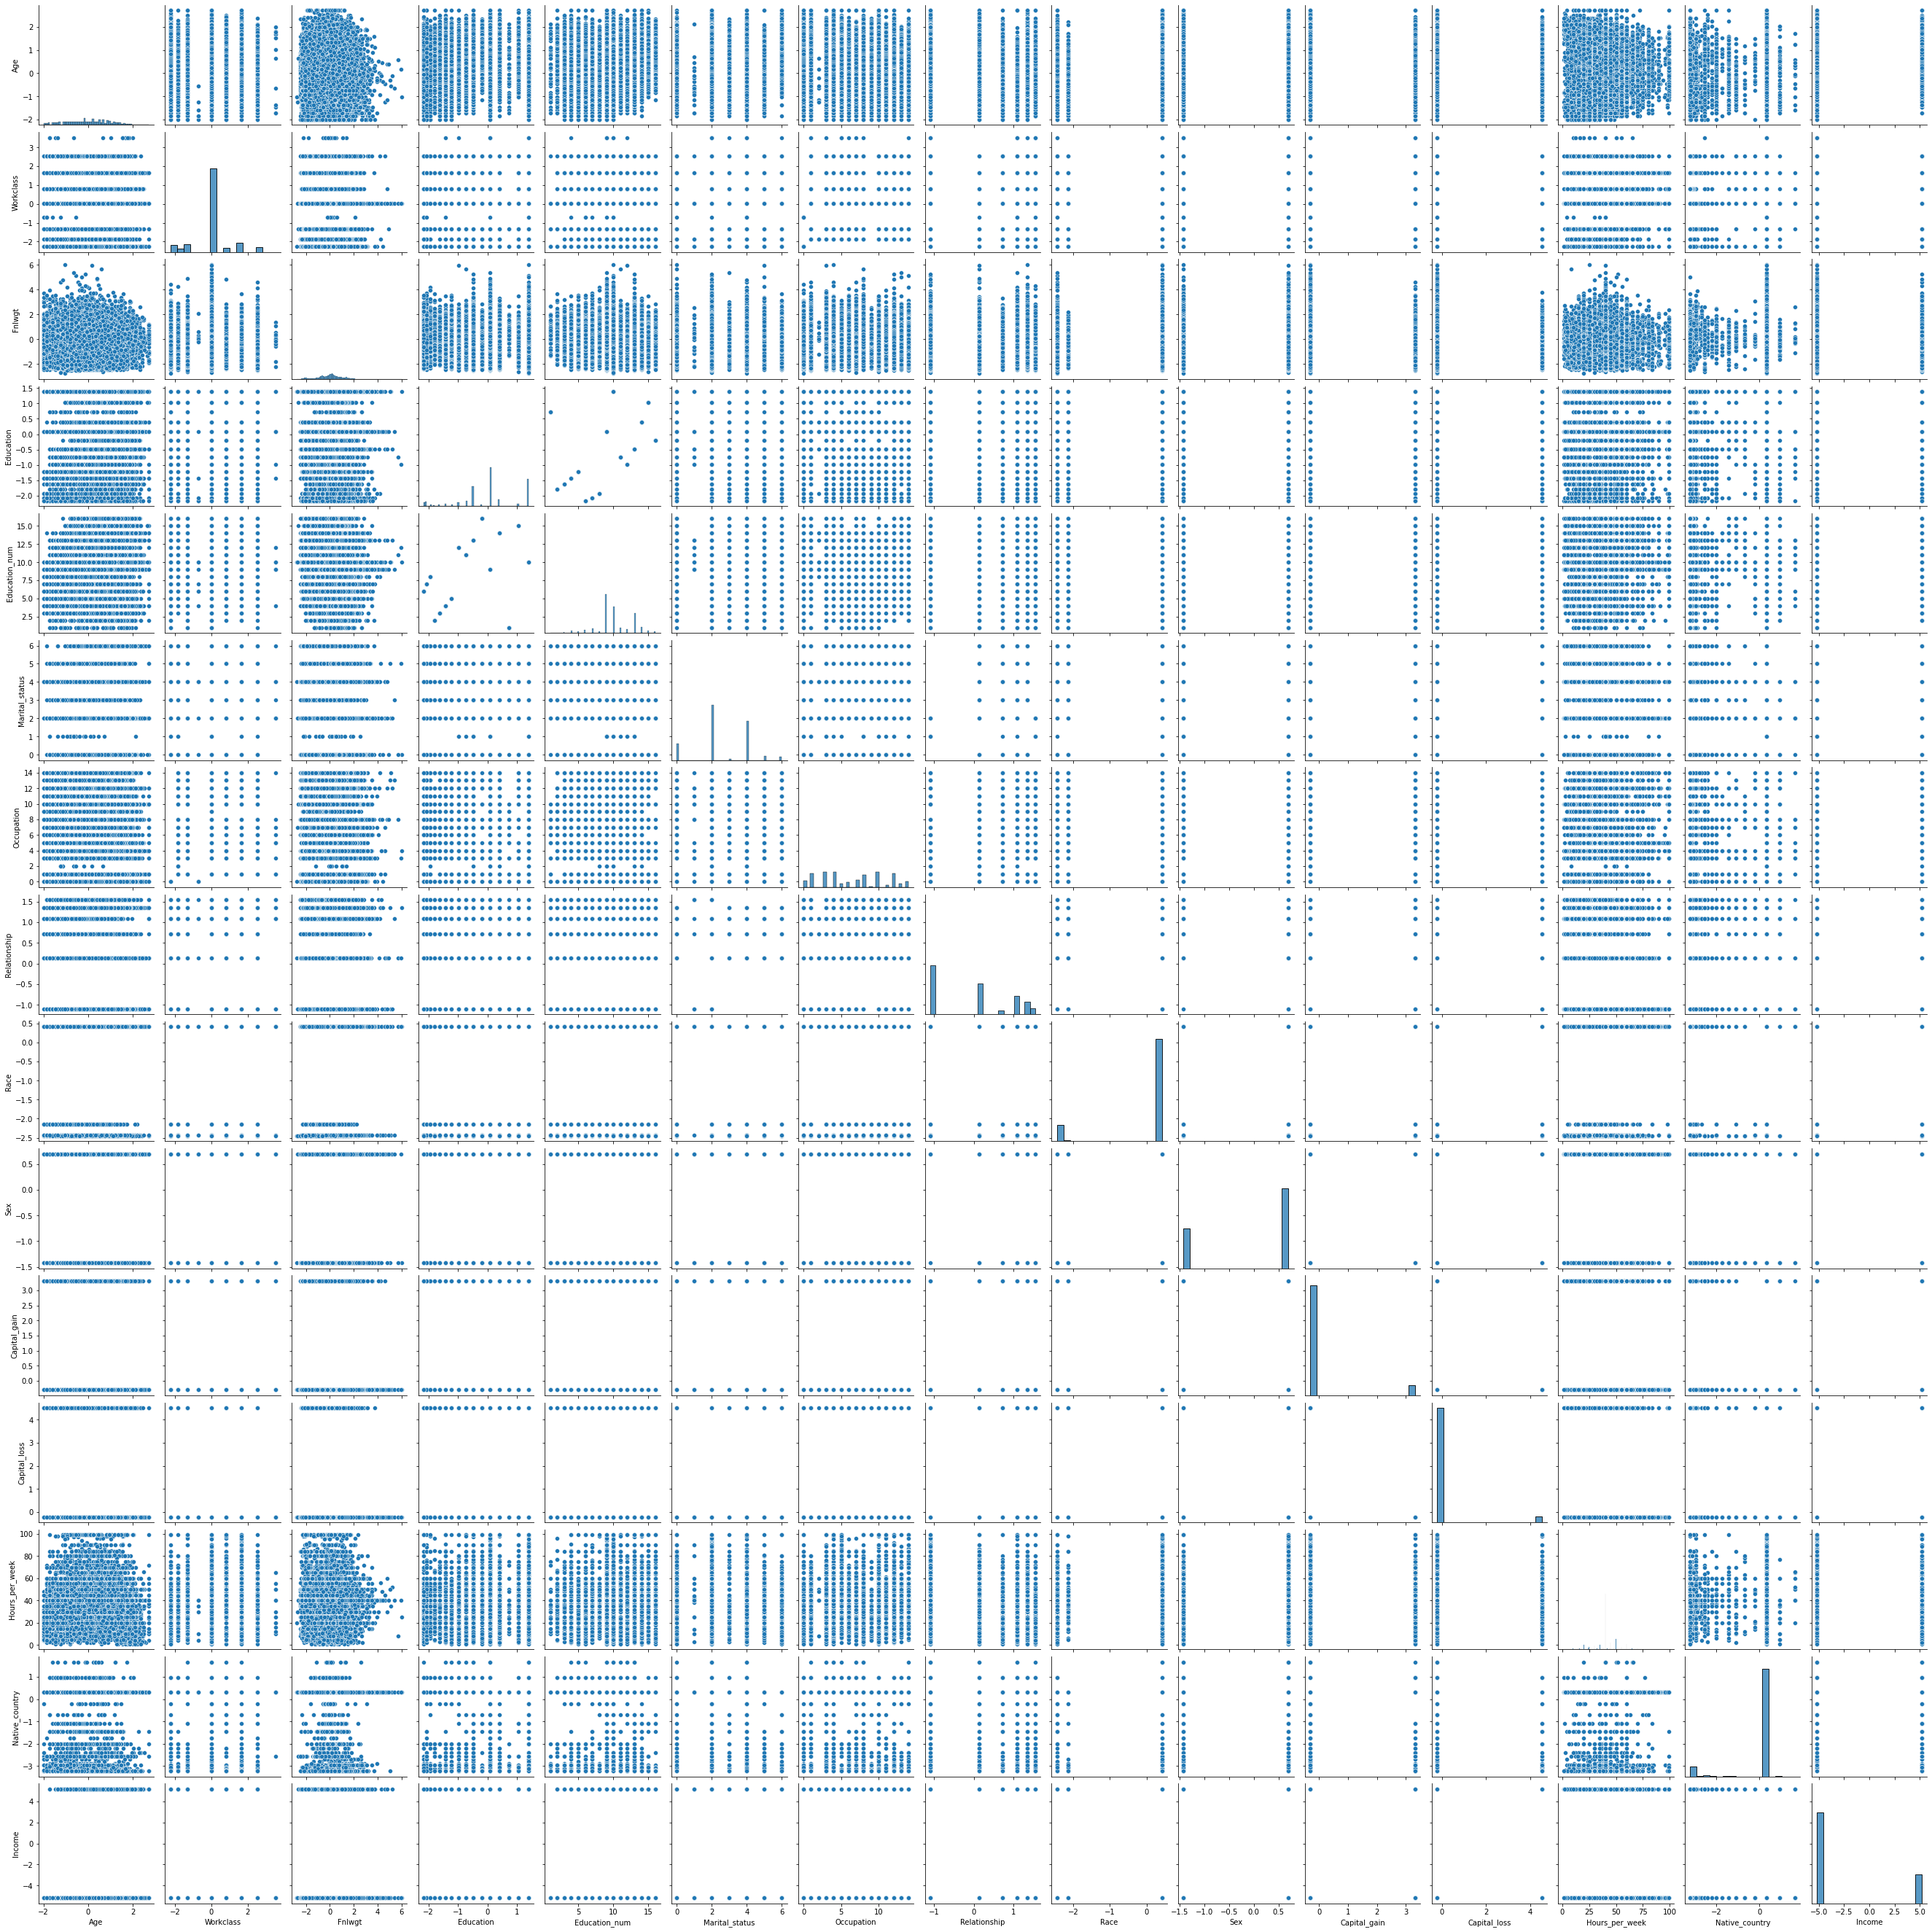

In [30]:
sns.pairplot(df)


In [39]:
# I am using labelEncoder again here to transform the Income label to int as that columns values has become float


df['Income']=le.fit_transform(df['Income'])

Here also no significant correlation can be found

let us check with VIF

Let us now standardize the data using standardscalar transformation & then Check Multi colinearity using VIF

In [40]:
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=["Income"])
y=df["Income"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [41]:
x_scaled.shape

(32536, 14)

In [42]:
# I shall drop Total Volume first 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns=["Income"])
y=df["Income"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.259970,Age
1,1.071887,Workclass
2,1.016065,Fnlwgt
3,1.111656,Education
4,1.173718,Education_num
5,1.174909,Marital_status
6,1.071787,Occupation
7,1.940466,Relationship
8,1.053968,Race
9,1.651085,Sex


Let us now move on to model bulding, but before that we need to treat the imbalance in data 

I use ADASYN on the train data for the same

In [43]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=30)
counter=Counter(y_train)
print('Before',counter)
smt=SMOTETomek(random_state=130)

x_train,y_train = smt.fit_resample(x_train,y_train)
counter=Counter(y_train)
print('After',counter)

Before Counter({0: 18556, 1: 5846})
After Counter({0: 18121, 1: 18121})


Now the data is much cleaner, let us build the model

# Model Fitting and Selection

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [45]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8357511679370543  on Random state 33


Now we split the dataset into training and test sets using this random_state and use SMOTETomek method to treat the imbalance in training data label

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=33)


from imblearn.combine import SMOTETomek

from collections import Counter

counter=Counter(y_train)
print('Before',counter)
smt=SMOTETomek(random_state=130)

x_train,y_train = smt.fit_resample(x_train,y_train)
counter=Counter(y_train)
print('After',counter)

Before Counter({0: 17188, 1: 5587})
After Counter({0: 16776, 1: 16776})


In [47]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [48]:
model=(lg,sv,knn,rfc,dt,gnb,ad)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.7712324556910153
[[5731 1778]
 [ 455 1797]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      7509
           1       0.50      0.80      0.62      2252

    accuracy                           0.77      9761
   macro avg       0.71      0.78      0.73      9761
weighted avg       0.83      0.77      0.79      9761

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.7857801454768979
[[5753 1756]
 [ 335 1917]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7509
           1       0.52      0.85      0.65      2252

    accuracy                           0.79      9761
   macro avg       0.73      0.81      0.75      9761
weighted avg       0.85      0.79      0.80      9761

-----------------------------------------------------------------------------------

RFC followed by ADABoost are giving good accuracy scores

# Cross Validation
We will check the Underfitting or Overfitting of the model using Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,x_scaled,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.8248095875946182
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8355976481854113
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.8191848993599535
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8517335309740188
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.8027723300017596
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7974860272928147
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8598477513082455
-------------------------------------------------------------------------------


RFC, DT, followed by ADABoost are giving the least difference between test accuracy and cv score

AUC Score of LogisticRegression()
0.7805874217960354




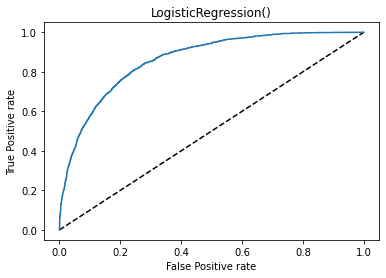



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.8086953145863802




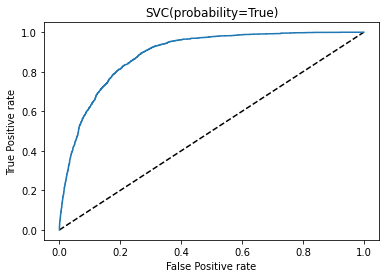



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.7845601559951623




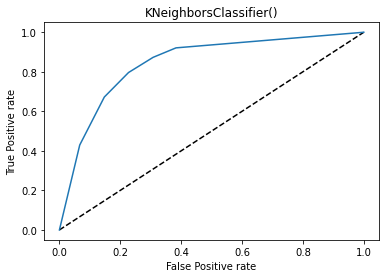



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.7972637394037753




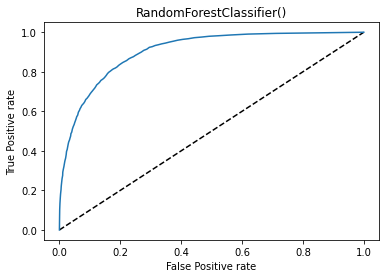



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.755684090873072




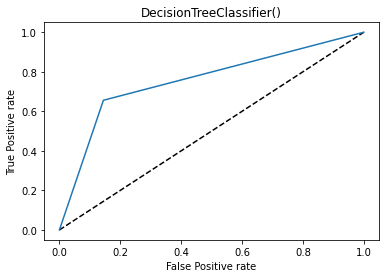



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.7780987563295862




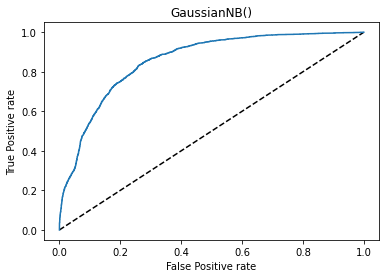



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.822248677549049




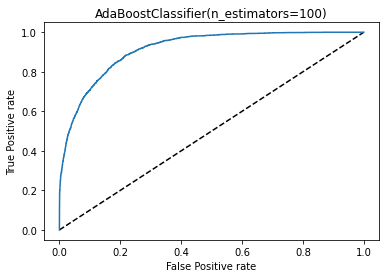



------------------------------------------------------------------------


In [51]:

from sklearn.metrics import roc_curve,roc_auc_score

for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

AUC score of Adaboost is maximum, followed by RFC

I shall try to choose the finalmodel after hypertuning the parameters

# Hypertuning

In [52]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,250,500],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

In [53]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

In [54]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 250, 500]})

In [55]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 250}

In [56]:
mod1=RandomForestClassifier(criterion='gini', max_depth= 9, n_estimators= 250)
mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.76016801557218


In [57]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':list(range(1, 200, 2)), 'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6],
         'criterion':['gini','entropy']}
rnd_srch = RandomizedSearchCV(RandomForestClassifier(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)

rnd_srch.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=161)

In [58]:
mod2=RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=161)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.62473107263601


In [68]:
# Let us try with ADABoost classifier now


from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':list(range(1, 200, 2)), 
         'learning_rate':[2,5,10,11,20,30,50],
         'random_state':[5,10,15,20,50,100,150,200],
         }
rnd_srch = RandomizedSearchCV(AdaBoostClassifier(base_estimator= dt),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)

rnd_srch.best_estimator_


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=20,
                   n_estimators=31, random_state=10)

In [69]:
rnd_srch.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=20,
                   n_estimators=31, random_state=10)

In [70]:
mod3=AdaBoostClassifier(base_estimator= dt)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.79090257145785


Let us save the mod2 as best model

In [71]:
import joblib
joblib.dump(mod2,'CensusIncome_model.obj')

['CensusIncome_model.obj']